<a href="https://colab.research.google.com/github/SANGEETHAPAULRAJ/mypythonsessions/blob/main/KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


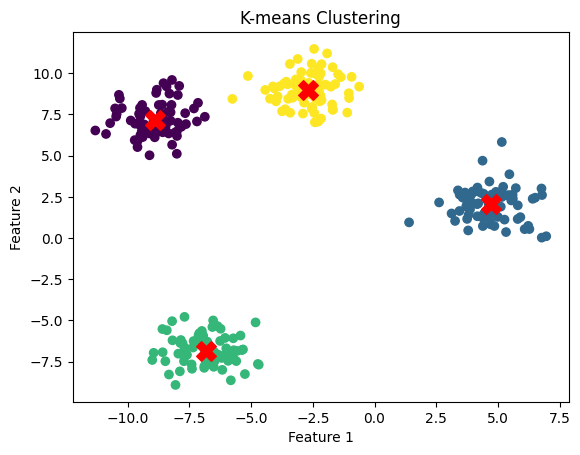

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
labels = kmeans.predict(data)
centers = kmeans.cluster_centers_

# Plot the data and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()


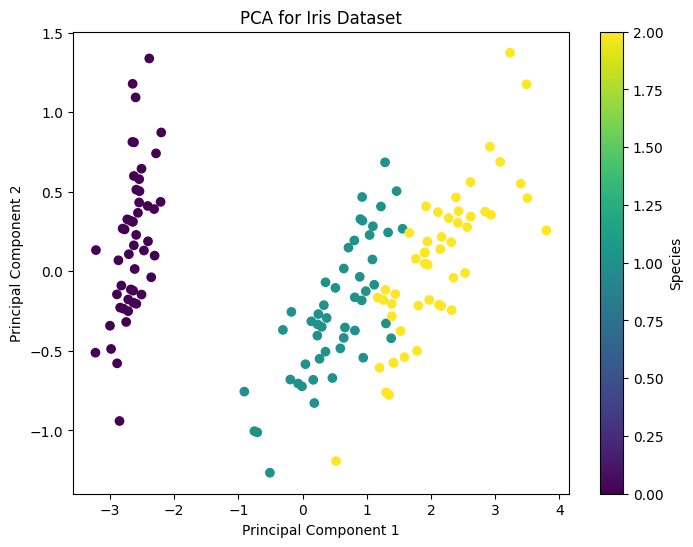

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for Iris Dataset')
plt.colorbar(label='Species')
plt.show()


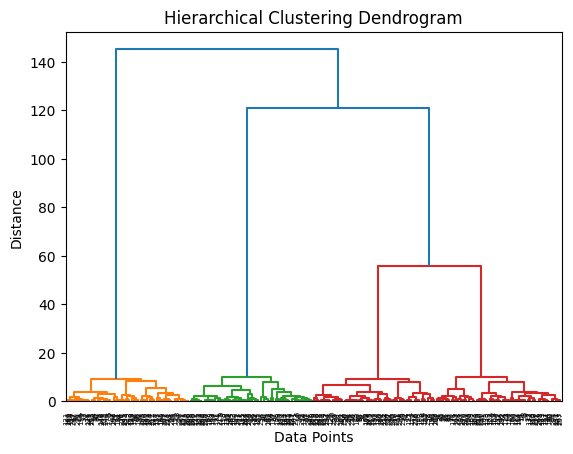

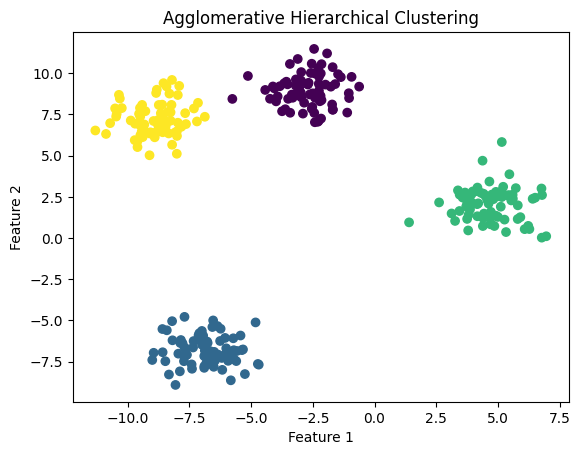

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Perform hierarchical clustering
linkage_matrix = linkage(data, method='ward')
dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Choose the number of clusters and perform clustering
n_clusters = 4
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
agglomerative.fit(data)

# Visualize the clustered data
plt.scatter(data[:, 0], data[:, 1], c=agglomerative.labels_, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Agglomerative Hierarchical Clustering")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.87


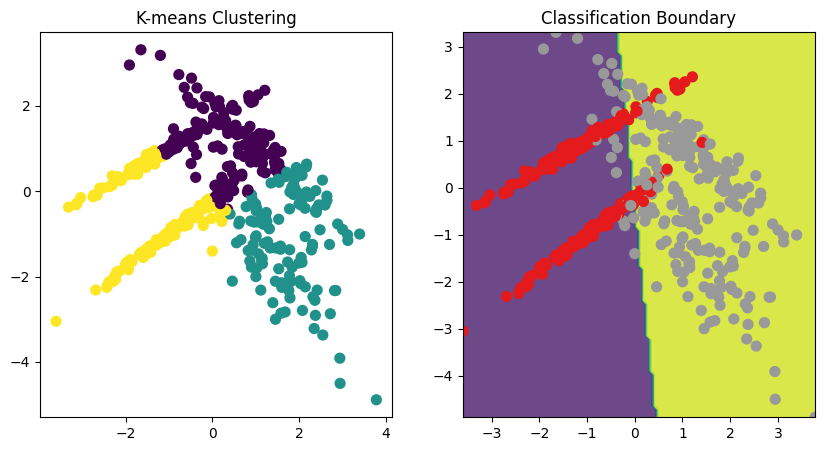

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic classification data
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

# Add cluster labels as a new feature
X_with_clusters = np.c_[X, cluster_labels]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_with_clusters, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the original data points with cluster colors
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("K-means Clustering")

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_with_clusters[:, 0].min(), X_with_clusters[:, 0].max(), 100),
                     np.linspace(X_with_clusters[:, 1].min(), X_with_clusters[:, 1].max(), 100))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape)])  # Add zeros for cluster labels
Z = Z.reshape(xx.shape)

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', s=50)
plt.title("Classification Boundary")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


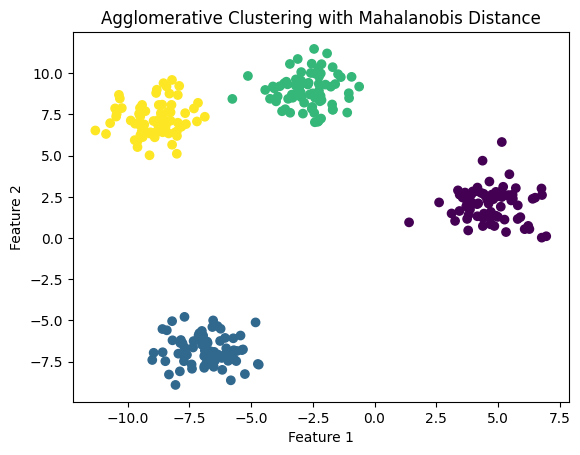

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Compute the covariance matrix for Mahalanobis distance
cov_matrix = EmpiricalCovariance().fit(data).covariance_

# Define a custom distance function using Mahalanobis distance
def mahalanobis_distance(X, Y):
    return pairwise_distances(X, Y, metric='mahalanobis', VI=cov_matrix)

# Apply Agglomerative clustering with custom distance metric
agglomerative = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='average')
distance_matrix = mahalanobis_distance(data, data)  # Compute the distance matrix
labels = agglomerative.fit_predict(distance_matrix)

# Plot the data and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering with Mahalanobis Distance')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

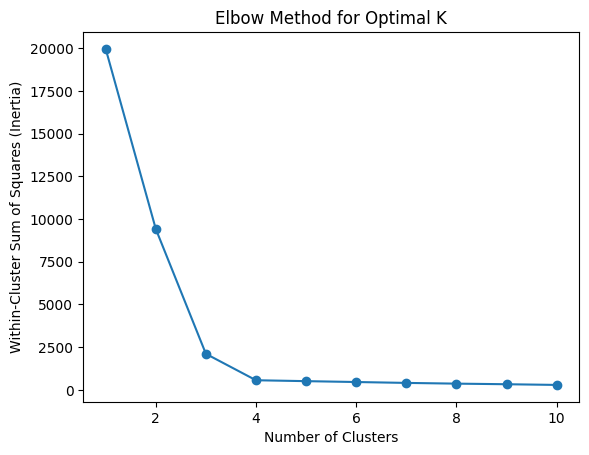

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Calculate within-cluster sum of squares (inertia) for different k values
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


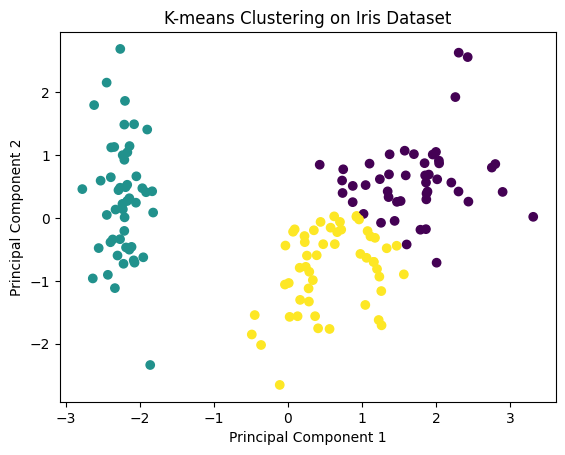

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on Iris Dataset')
plt.show()
